# Import Liabiries 

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("D:/Top_mentor/Oct/29th oct/b88assignments/Project - 3&4_Multiple_Reg/Project - 3&4_Multiple_Reg/50_Startups.csv")

# Present Top 10 rows

In [5]:
data.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Copy data set

In [6]:
df1=data.copy()

# No. of rows 

In [7]:
row=df1.shape[0]
print("No. of rows =", row)

No. of rows = 50


# No. of columns 

In [8]:
col = df1.shape[1]
print("No. of columns =", row)

No. of columns = 50


# Data information 

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Statistics of data 

In [10]:
df1.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


# Missing or null value findings 

In [11]:
null= df1.isnull().sum()*100/len(df1)
null

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

<Axes: >

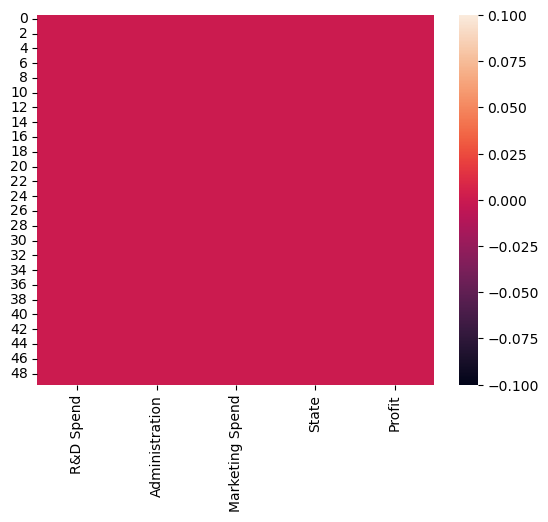

In [12]:
sns.heatmap(df1.isnull())

There is no Null value in dataset 

# Number of states

In [13]:
state=df1['State'].nunique()
print('Number of states = ', state)

Number of states =  3


# Profit by state

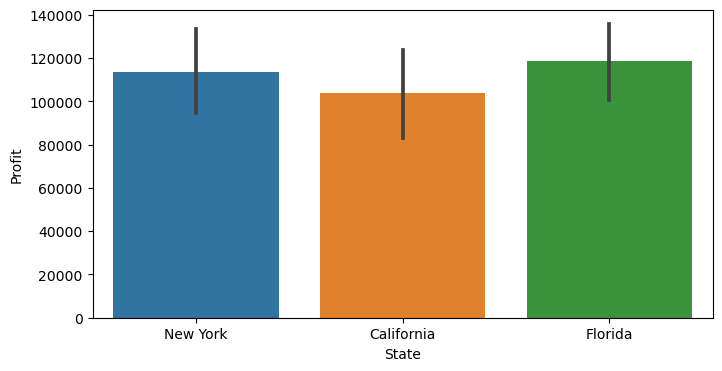

In [14]:
plt.figure(figsize=(8,4))
sns.barplot(x='State', y='Profit',  data=df1)
plt.show()

# Average profit by state 

In [15]:
df1.groupby('State')['Profit'].mean()

State
California    103905.175294
Florida       118774.024375
New York      113756.446471
Name: Profit, dtype: float64

# Marketing Spend by state 

In [16]:
max_mar =df1.groupby('State')['Marketing Spend'].mean()
max_mar

State
California    182540.929412
Florida       247323.551250
New York      205346.015882
Name: Marketing Spend, dtype: float64

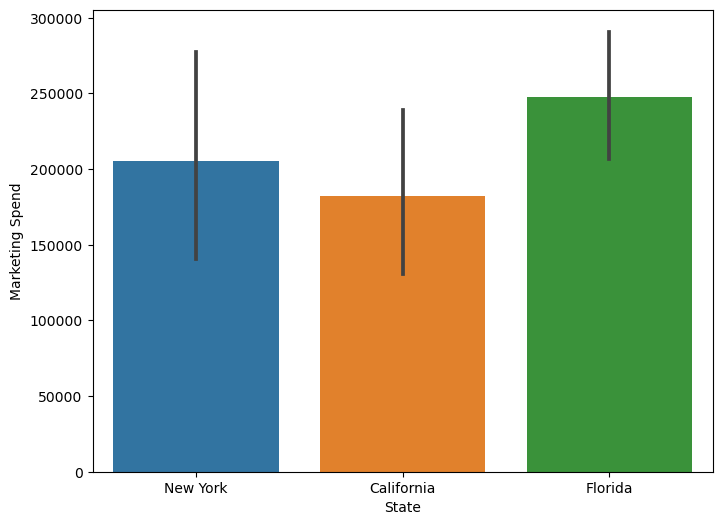

In [17]:
plt.figure(figsize=(8,6))
sns.barplot(x='State', y='Marketing Spend',  data=df1)
plt.show()

# Relation between 'Profit' and 'Marketing Spend'

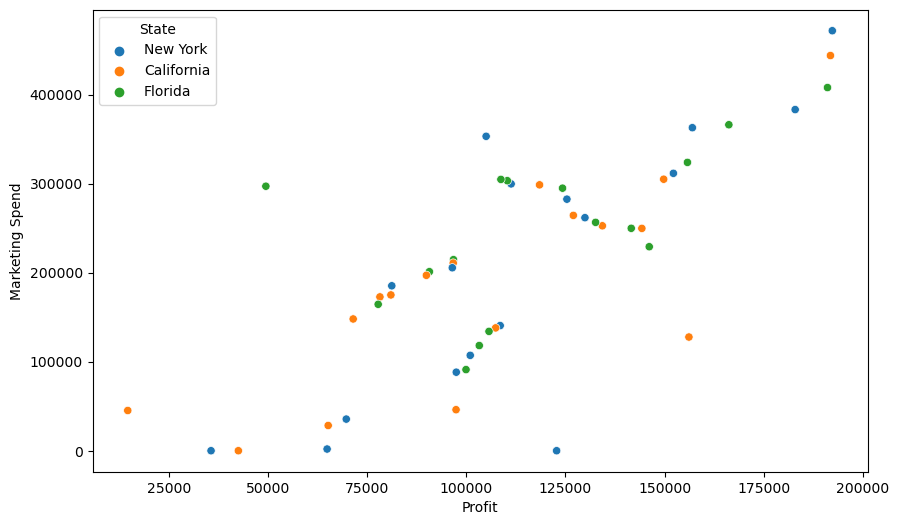

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Profit', y='Marketing Spend', hue='State', data=df1)
plt.show()

# Highest administartion cost oriented state

In [19]:
df1[df1['Administration'].max()==df1['Administration']][['State','Administration']]

,State,Administration
28,Florida,182645.56


Maximum administartion cost by state Florida around 182645.56

# R&D spend by state

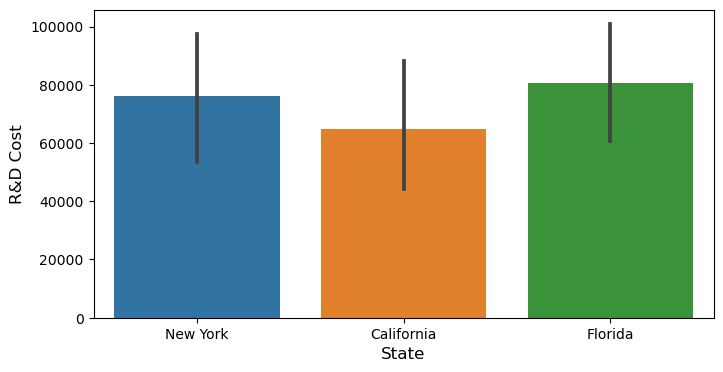

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(x='State', y='R&D Spend',  data=df1)
plt.xlabel('State', fontsize = 12)
plt.ylabel('R&D Cost', fontsize = 12)

plt.show()

# Maximum R&D spend by state 

In [21]:
df1[df1['R&D Spend'].max()==df1['R&D Spend']][['State','R&D Spend']]

,State,R&D Spend
0,New York,165349.2


Maximum R&D cost by state New York around 165349.2

# Graphical presenation of relation between Profit and R&D spend 

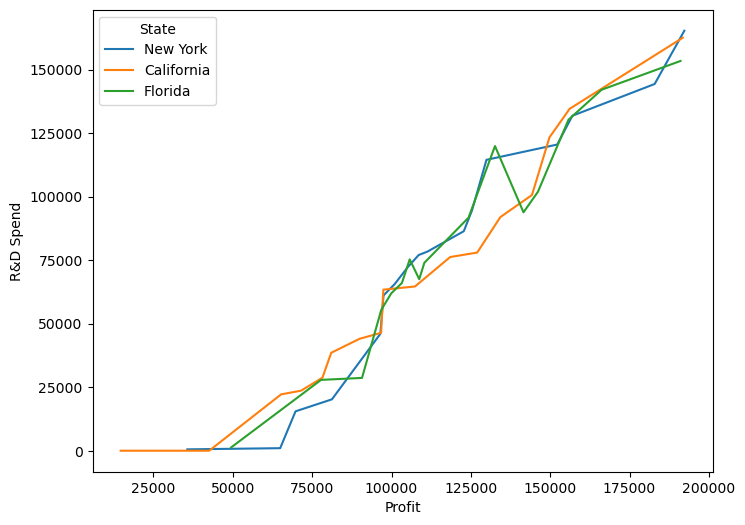

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Profit', y='R&D Spend', hue='State', data=df1)
plt.show()

# Calcualtion of total cost 

In [23]:
df1.columns 

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [24]:
df1['Total_cost']=df1['R&D Spend']+ df1['Administration']+ df1['Marketing Spend']

In [25]:
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_cost
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53


# Total cost and profit trend line analysis state wise

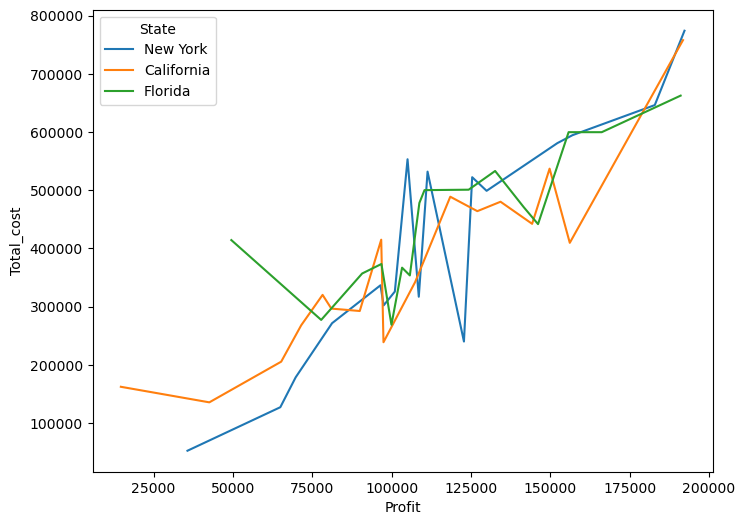

In [26]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Profit', y='Total_cost', hue='State', data=df1)
plt.show()

# Max profit and Total cost orineted state

In [27]:
max_pro_tc = df1.groupby('State')[['Profit','Total_cost']].max()
max_pro_tc

,Profit,Total_cost
State,,
California,191792.06,757873.82
Florida,191050.39,662521.60
New York,192261.83,774031.10


# Encode State column

In [28]:
dummy = pd.get_dummies(df1['State']).astype('int')
dummy.head(2)

,California,Florida,New York
0,0,0,1
1,1,0,0


# Join DF1 and dummy sheet 

In [29]:
final_data = pd.concat([df1,dummy], axis=1)

In [30]:
final_data.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_cost,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,0,1,0


In [31]:
final_data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'Total_cost', 'California', 'Florida', 'New York'],
      dtype='object')

In [32]:
X=final_data[['R&D Spend', 'Administration', 'Marketing Spend', 'California', 'Florida', 'New York']]

In [33]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.2,136897.80,471784.10,0,0,1
1,162597.7,151377.59,443898.53,1,0,0


In [34]:
y=final_data['Profit']


In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=5612)

In [37]:
final_data.shape

(50, 9)

In [38]:
X_train.shape

(35, 6)

In [39]:
X_test.shape

(15, 6)

# Model fitting

In [40]:
from sklearn.linear_model import LinearRegression 

In [41]:
model= LinearRegression()
model_train=model.fit(X_train, y_train)

In [42]:
pred1=model_train.predict(X_test)

In [43]:
pred1

array([ 51098.34009208, 104469.38564144, 128689.98483615, 158982.22848538,
       114250.21233399, 150487.12858695, 164634.70233416, 190393.24470632,
       118985.57208791, 191045.71545156,  73534.81843834, 174943.96973121,
        48194.94580221,  74162.00250969,  53075.89956777])

In [44]:
p=pd.DataFrame(pred1, columns=['Pred_profit'])

In [45]:
p['Actual']=y_test.values

In [46]:
p.head(6)

,Pred_profit,Actual
0,51098.340092,14681.40
1,104469.385641,97427.84
2,128689.984836,125370.37
3,158982.228485,149759.96
4,114250.212334,111313.02
5,150487.128587,132602.65


# Score and error

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [48]:
round(sqrt(mean_squared_error(p['Actual'], p['Pred_profit'])))

13851

In [49]:
str=round(r2_score(p['Actual'], p['Pred_profit'])*100)
print('Strangth of the model =',str )

Strangth of the model = 93


In [50]:
mean_absolute_error(p['Actual'], p['Pred_profit'])

10495.245965985248

# Save the model

In [51]:
import joblib

In [52]:
filename = 'joblib_reg_model.sav'
joblib.dump(model_train,filename)

['joblib_reg_model.sav']